# Artificial Neural Networks - Exercise
Oliver Vinzelberg

### Fashion MNIST
There is just one task this time: Repeat the training part of the notebook we used in class replacing the MNIST dataset with [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist), but also do some experimentation with the MLP-Parameters
* $n_h$: number of hidden layers
* $m_j,\>j=1,\dots,n_h$: number of neurons in the $j$-th hidden layer

# Classifying fashion pictures

The Fashion-MNIST dataset is meant to be a drop-in replacement for MNIST. It also consists of $28 \times 28$ pixel images, where each pixel is represented by a gray scale value. Therefore, we have $28\times28=784$ *features* per row, so the images are then *unrolled* into vectors of length $784$ and each one in both the training set as well as the test set is given a *class label* of $0-9$ corresponding to the type of fashion item it represents.

## Obtaining the Fashion-MNIST dataset

The Fashion-MNIST dataset is publicly available on [GitHub](https://github.com/zalandoresearch/fashion-mnist). After that, everything works just like before ...


In [15]:
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' 
                                % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' 
                               % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                             dtype=np.uint8).reshape(len(labels), 784)
 
    return images, labels

In [13]:
X_train, y_train = load_mnist('fashion_mnist', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

Rows: 60000, columns: 784


In [12]:
X_test, y_test = load_mnist('fashion_mnist', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 10000, columns: 784


## Visualize the **seventeenth** object of each class:

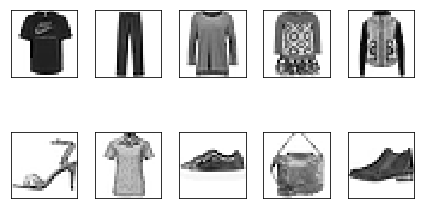

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][17].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Visualize 25 different versions of sandals:

Label 	Description

0 	T-shirt/top

1 	Trouser

2 	Pullover

3 	Dress

4 	Coat

5 	Sandal

6 	Shirt

7 	Sneaker

8 	Bag

9 	Ankle boot

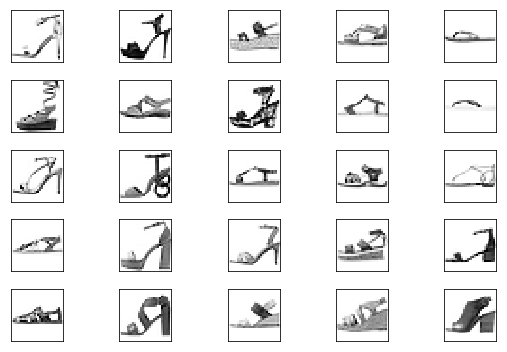

In [27]:
#according to the dataset description, sandals are class nr 5
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(8, 5))
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 5][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Classification using a multi-layer perceptron

Use `scikit learn`'s `MLPClassifier` to train various models with
* different numbers of hidden layers
* different numbers of neurons in the hidden layers

For each variant you try out record:
* how *long* it took to train the network
* how many epochs were necessary
* how the loss values evolved over the epochs
* the accuracy
  + on the training data
  + on the test data

### First Try

In [28]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(50,50), activation='logistic', solver='sgd', alpha=0.001, batch_size=50,
                   learning_rate='constant', learning_rate_init=0.001, max_iter=1000, verbose=True, random_state=1)

In [29]:
import datetime as dt
start = dt.datetime.now()
nn.fit(X_train, y_train)
end = dt.datetime.now()

Iteration 1, loss = 2.04022191
Iteration 2, loss = 1.48878806
Iteration 3, loss = 1.13403572
Iteration 4, loss = 0.91995818
Iteration 5, loss = 0.80144316
Iteration 6, loss = 0.73152979
Iteration 7, loss = 0.69198151
Iteration 8, loss = 0.67385307
Iteration 9, loss = 0.65688907
Iteration 10, loss = 0.65352512
Iteration 11, loss = 0.63840628
Iteration 12, loss = 0.62946215
Iteration 13, loss = 0.63672224
Iteration 14, loss = 0.64000187
Iteration 15, loss = 0.63631276
Iteration 16, loss = 0.62329822
Iteration 17, loss = 0.61351964
Iteration 18, loss = 0.63102649
Iteration 19, loss = 0.64760021
Iteration 20, loss = 0.62941091
Iteration 21, loss = 0.62456158
Iteration 22, loss = 0.62626325
Iteration 23, loss = 0.64708063
Iteration 24, loss = 0.63946720
Iteration 25, loss = 0.64406102
Iteration 26, loss = 0.63140090
Iteration 27, loss = 0.61990500
Iteration 28, loss = 0.62047919
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [30]:
print('It took {} to train the neural network in {} epochs'.format(end-start, nn.n_iter_))

It took 0:01:14.852270 to train the neural network in 28 epochs


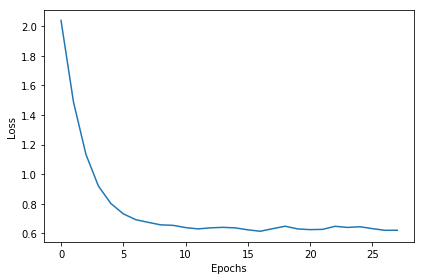

In [31]:
%matplotlib inline
loss_values = nn.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
# plt.plot(range(len(nn.loss_)), nn.loss_)
# plt.ylim([0, 2000])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [32]:
y_train_pred = nn.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 77.74%


In [33]:
y_test_pred = nn.predict(X_test)
acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 75.75%


### Second Try

In [35]:
nn2 = MLPClassifier(hidden_layer_sizes=(20,30), activation='logistic', solver='sgd', alpha=0.001, batch_size=50,
                   learning_rate='constant', learning_rate_init=0.001, max_iter=1000, verbose=True, random_state=1)

In [43]:
start = dt.datetime.now()
nn2.fit(X_train, y_train)
end = dt.datetime.now()

Iteration 1, loss = 2.15019554
Iteration 2, loss = 1.76890498
Iteration 3, loss = 1.43944882
Iteration 4, loss = 1.22563429
Iteration 5, loss = 1.09192697
Iteration 6, loss = 0.98891725
Iteration 7, loss = 0.92320447
Iteration 8, loss = 0.88688028
Iteration 9, loss = 0.85035618
Iteration 10, loss = 0.83935081
Iteration 11, loss = 0.80869885
Iteration 12, loss = 0.79542087
Iteration 13, loss = 0.75921146
Iteration 14, loss = 0.72907596
Iteration 15, loss = 0.74469793
Iteration 16, loss = 0.74507859
Iteration 17, loss = 0.73015884
Iteration 18, loss = 0.75212490
Iteration 19, loss = 0.74344823
Iteration 20, loss = 0.73058394
Iteration 21, loss = 0.72362069
Iteration 22, loss = 0.71127196
Iteration 23, loss = 0.69385831
Iteration 24, loss = 0.69078817
Iteration 25, loss = 0.68487084
Iteration 26, loss = 0.73701581
Iteration 27, loss = 0.71290076
Iteration 28, loss = 0.70035461
Iteration 29, loss = 0.67554056
Iteration 30, loss = 0.68868665
Iteration 31, loss = 0.69688412
Iteration 32, los

In [44]:
print('It took {} to train the neural network in {} epochs'.format(end-start, nn2.n_iter_))

It took 0:01:27.350297 to train the neural network in 61 epochs


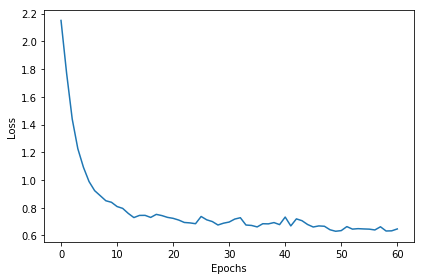

In [45]:
%matplotlib inline
loss_values = nn2.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
# plt.plot(range(len(nn.loss_)), nn.loss_)
# plt.ylim([0, 2000])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [46]:
y_train_pred = nn2.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 78.26%


In [47]:
y_test_pred = nn2.predict(X_test)
acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 76.82%


A little improvement can be seen.

### Third Try

In [41]:
nn3 = MLPClassifier(hidden_layer_sizes=(100,100), activation='logistic', solver='sgd', alpha=0.001, batch_size=50,
                   learning_rate='constant', learning_rate_init=0.001, max_iter=1000, verbose=True, random_state=1)

In [48]:
start = dt.datetime.now()
nn3.fit(X_train, y_train)
end = dt.datetime.now()

Iteration 1, loss = 1.84829340
Iteration 2, loss = 1.14418828
Iteration 3, loss = 0.84861266
Iteration 4, loss = 0.70916868
Iteration 5, loss = 0.64088925
Iteration 6, loss = 0.59850573
Iteration 7, loss = 0.57612948
Iteration 8, loss = 0.56475343
Iteration 9, loss = 0.56754524
Iteration 10, loss = 0.56873154
Iteration 11, loss = 0.55929701
Iteration 12, loss = 0.55315861
Iteration 13, loss = 0.54880307
Iteration 14, loss = 0.54803852
Iteration 15, loss = 0.57546670
Iteration 16, loss = 0.56447655
Iteration 17, loss = 0.55479863
Iteration 18, loss = 0.56636720
Iteration 19, loss = 0.55519736
Iteration 20, loss = 0.56319893
Iteration 21, loss = 0.58173446
Iteration 22, loss = 0.57508688
Iteration 23, loss = 0.56612139
Iteration 24, loss = 0.57362432
Iteration 25, loss = 0.58276209
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [49]:
print('It took {} to train the neural network in {} epochs'.format(end-start, nn3.n_iter_))

It took 0:01:37.325249 to train the neural network in 25 epochs


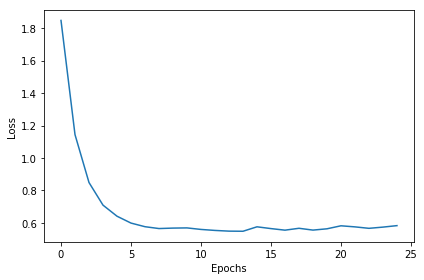

In [50]:
%matplotlib inline
loss_values = nn3.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
# plt.plot(range(len(nn.loss_)), nn.loss_)
# plt.ylim([0, 2000])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [51]:
y_train_pred = nn3.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 79.27%


In [52]:
y_test_pred = nn3.predict(X_test)
acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 77.67%


Again a little bit better.

### Fourth Try

In [53]:
nn4 = MLPClassifier(hidden_layer_sizes=(100,10), activation='logistic', solver='sgd', alpha=0.001, batch_size=50,
                   learning_rate='constant', learning_rate_init=0.001, max_iter=1000, verbose=True, random_state=1)

In [54]:
start = dt.datetime.now()
nn4.fit(X_train, y_train)
end = dt.datetime.now()

Iteration 1, loss = 2.04527314
Iteration 2, loss = 1.49577157
Iteration 3, loss = 1.14902785
Iteration 4, loss = 0.96254272
Iteration 5, loss = 0.85376036
Iteration 6, loss = 0.77864370
Iteration 7, loss = 0.73335948
Iteration 8, loss = 0.69289705
Iteration 9, loss = 0.66539242
Iteration 10, loss = 0.65200120
Iteration 11, loss = 0.62743158
Iteration 12, loss = 0.61780094
Iteration 13, loss = 0.61658571
Iteration 14, loss = 0.62105095
Iteration 15, loss = 0.61235820
Iteration 16, loss = 0.61061303
Iteration 17, loss = 0.59119929
Iteration 18, loss = 0.60245348
Iteration 19, loss = 0.59299126
Iteration 20, loss = 0.58994453
Iteration 21, loss = 0.59371890
Iteration 22, loss = 0.59389553
Iteration 23, loss = 0.60191118
Iteration 24, loss = 0.59582703
Iteration 25, loss = 0.59231722
Iteration 26, loss = 0.59957680
Iteration 27, loss = 0.59503130
Iteration 28, loss = 0.60018525
Iteration 29, loss = 0.58676778
Iteration 30, loss = 0.59452897
Iteration 31, loss = 0.59772258
Iteration 32, los

In [55]:
print('It took {} to train the neural network in {} epochs'.format(end-start, nn4.n_iter_))

It took 0:04:12.309969 to train the neural network in 67 epochs


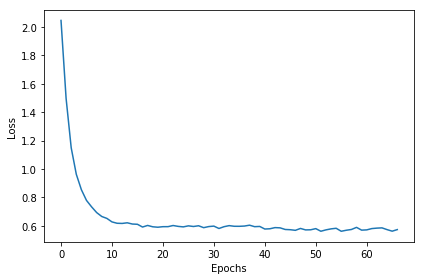

In [56]:
%matplotlib inline
loss_values = nn4.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
# plt.plot(range(len(nn.loss_)), nn.loss_)
# plt.ylim([0, 2000])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [57]:
y_train_pred = nn4.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 79.77%


In [58]:
y_test_pred = nn4.predict(X_test)
acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 79.10%


In the fourth try the accuracy got even better!

### Visualize 20 misclassifications ...
... and state an opinion on these

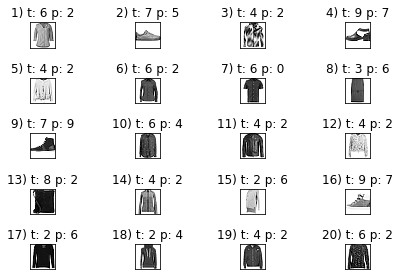

In [65]:
miscl_img = X_test[y_test != y_test_pred][:20]
correct_lab = y_test[y_test != y_test_pred][:20]
miscl_lab= y_test_pred[y_test != y_test_pred][:20]

fig, ax = plt.subplots(nrows=5, ncols=4, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(20):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

Opinion: The most misclassifcations happen with the classes 6,2,4. These are Shirt, Pullover, Coat which look quite similar to each other and that is propably why the Model has problems differentiating those. 
The next problem happens with the classes 7, 5, 9. These are Sneaker, Ankle boot and Sandal which also look similar sometimes and are hard to differentiate (sometimes) for the model.

Label 	Description

0 	T-shirt/top

1 	Trouser

2 	Pullover

3 	Dress

4 	Coat

5 	Sandal

6 	Shirt

7 	Sneaker

8 	Bag

9 	Ankle boot

<br>
<br>